# Overview

This week is all about working with data. I'm not going to lie to you. This part might be frustrating - but frustration is an integral part of learning. Real data is almost always messy & difficult ... and learning to deal with that fact, is a key part of being a data scientist. 

Enough about the process, let's get to the content! Welcome to ... (drumroll drumroll drumroll)

# <center> The Legend of Zelda: Breath of the Wild </center>

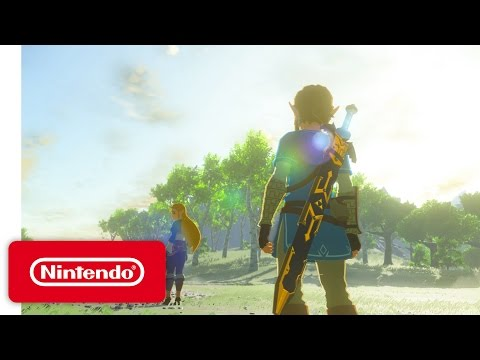

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo("zw47_q9wbBE",width=800, height=450)

Today, we will use network science and the [Zelda Wiki](https://zelda.fandom.com/wiki/Main_Page) to learn about the relationships of BotW characters. 

To create the network, we will download the Zelda Wiki pages for all characters in BotW (enemies and bosses included). Next, we will create the network of the pages that link to each other. Since wiki pages not only link to [Link](https://zelda.fandom.com/wiki/Link) but also to each other (Anna: "yes.. I know.. bad joke -- but come on our hero's name is Link!!!! I can't help myself"). So [Link](https://zelda.fandom.com/wiki/Link) links to  [Princess Zelda](https://zelda.fandom.com/wiki/Princess_Zelda) and viceversa, for example.  

Next time, we'll use our network skills (as well as new ones) to understand that network. Further down the line, we'll use natural language processing to understand the text displayed on those pages.

But for today, the tasks are:

* Learn about regular expressions
* Learn about Pandas dataframes
* Download and store (for later use) all characters and their pages from the Zelda Wiki
* Extract all the internal wiki-links that connect the characters on the Zelda Wiki
* Generate the network of characters from the Zelda Wiki. 
* Calculate some simple network statistics.

---

# Prelude part 1: Regular expressions

Before we get started, we have to get a little head start on the _Natural Language Processing_ part of the class. This is a new direction for us, up to now, we've mostly been doing math-y stuff with Python, but today, we're going to be using Python to work through a text. The central thing we need to be able to do today, is to extract internal wiki links. And for that we need regular expressions.

> _Exercises_: Regular expressions round 1\.
> 
> * Read [**this tutorial**](https://developers.google.com/edu/python/regular-expressions) to form an overview of regular expressions. This is important to understand the content of the tutorial (also very useful later), so you may actually want to work through the examples.
> * Now, explain in your own words: what are regular expressions?
<font color='red'>Regular expressions are a method of matching text patters. </font>


> * Provide an example of a regex to match 4 digits numbers (by this, I mean precisely 4 digits, you should not match any part of numbers with e.g. 5 digits). In your notebook, use `findall` to show that your regex works on this [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/regex_exercise.txt). **Hint**: a great place to test out regular expressions is: https://regex101.com.


In [8]:
import urllib
import re
url = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/regex_exercise.txt"
file = urllib.request.urlopen(url)

for line in file:
    decoded_line = line.decode("utf-8")
    matches = re.search(r'\d\d\d\d', decoded_line) 
    print(matches)



<re.Match object; span=(221, 225), match='1234'>
None
<re.Match object; span=(457, 461), match='9999'>
None
None
None
<re.Match object; span=(210, 214), match='2345'>


In [9]:
url = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/regex_exercise.txt"
file = urllib.request.urlopen(url)
f = file.read()

overall_mat = re.findall(r'\d\d\d\d', f.decode("utf-8"))
print(overall_mat)

['1234', '9999', '2345']


> * Provide an example of a regex to match words starting with "super". Show that it works on the [test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/regex_exercise.txt).
> 

In [10]:
overall_mat = re.findall('super\w+', f.decode("utf-8"))
print(overall_mat)

['superpolaroid', 'supertaxidermy', 'superbeer']


Finally, we need to figure out how to match internal Zelda wiki links. Zelda wiki links come in different [flavors](https://zelda.fandom.com/wiki/Guidelines:Getting_Started). First, let's focus on those linking to pages directly (this step will help us collecting the list of characters).

Direct links are always enclosed in double square brackets, e.g. `[[name of character]]`, or double curly brackets, `{{Term|Series|name of character|link}}` and occur like this:

    ... some text [[Princess Zelda]] some more text ...
    ... some text {{Term|BotW|Princess Zelda|link}} some more text ...
    
both linking to the page [`https://zelda.fandom.com/wiki/Princess_Zelda`](https://zelda.fandom.com/wiki/Princess_Zelda).

The second type of link uses text that is different from the page name, here's an example:

    ... some text [[Princess Zelda|Zelda]] some more text ... 
    ... some text {{Term|BotW|Princess Zelda|link|display=Zelda}} some more text ...

both still linking to the page [`https://zelda.fandom.com/wiki/Princess_Zelda`](https://zelda.fandom.com/wiki/Princess_Zelda). Note that there are many series of The Legend of Zelda, but, because we are going to focus on Breath of the Wild (BotW) and to make our data collection a little bit easier, we will **not look for direct links to other series** even if characters can be recurrent (i.e. we will look for links in double curly brackets always in the form `{{Term|BotW|name of character|link}}`).

Now it's your turn.

> _Exercise_: Regular expressions round 2\. Show that you can extract the direct Zelda wiki links from the [Zelda test-text](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/Zelda_regex_exercise.txt). Perhaps you can find inspiration on stack overflow or similar. **Hint**: Try to solve this exercise on your own (that's what you will get the most out of - learning wise), but if you get stuck ... you will find the solution in one of the video lectures below.
> 

In [11]:
url = "https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2021/main/files/Zelda_regex_exercise.txt"
file = urllib.request.urlopen(url)
f = file.read()

#extract the name of the character
#format1
characters = re.findall(r'\[\[\w+\]\]', f.decode("utf-8"))

print(characters)
for character in characters:
    character1 = re.split("[[|\]]", character)
    character1 = character1[2]
    link = 'https://zelda.fandom.com/wiki/' + character1
    print(link)
#put it in a link format


['[[Champion]]', '[[Urbosa]]', '[[Daruk]]']
https://zelda.fandom.com/wiki/Champion
https://zelda.fandom.com/wiki/Urbosa
https://zelda.fandom.com/wiki/Daruk


/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Possible nested set at position 1
  # This is added back by InteractiveShellApp.init_path()


In [12]:
#format2 {{Term|BotW|Princess Zelda|link}}
characters2 = re.findall(r'\{\{(.*?)\}\}', f.decode("utf-8"))
#format2 {{Term|BotW|Princess Zelda|link}}

print(characters)
for character in characters2:
    #print(character)
    character1 = re.split("\|", character)
    #print(character1)
    if len(character1[2])>2:
        character1[2] = character1[2].replace(" ", "")
        print(character1[2])
    link = 'https://zelda.fandom.com/wiki/' + character1[2]
    print(link)
#put it in a link format


['[[Champion]]', '[[Urbosa]]', '[[Daruk]]']
Link
https://zelda.fandom.com/wiki/Link
CalamityGanon
https://zelda.fandom.com/wiki/CalamityGanon
DivineBeastVahRudania
https://zelda.fandom.com/wiki/DivineBeastVahRudania


In [13]:
base_url = "https://zelda.fandom.com/api.php"
payload = {
            'format':'json',
            'action':'query',
            'titles':[title],
            'prop':'revisions',
            'rvslots': '*',
            'rvprop': 'content'

}

r = requests.get(base_url, params=payload)
req_json = r.json()

req_json['query']


{'normalized': [{'from': 'Characters_in_Breath_of_the_Wild',
   'to': 'Characters in Breath of the Wild'}],
 'pages': {'77604': {'pageid': 77604,
   'ns': 0,
   'title': 'Characters in Breath of the Wild',
   'revisions': [{'slots': {'main': {'contentmodel': 'wikitext',
       'contentformat': 'text/x-wiki',
       '*': '{{DISPLAYTITLE: Characters in {{BotW|-}}}}\nThe following is a list of characters from {{BotW}}.\n\n==Greater {{Term|BotW|Hyrule}}==\n<gallery>\nFile:BotW Baddek Model.png|{{Term|BotW|Baddek|link}}<!-- Hebra and Central Hyrule -->\nFile:BotW Bamboo Model.png|{{Term|BotW|Bamboo|link}}<!-- Baumar\'s Horse -->\nFile:BotW Banji Model.png|{{Term|BotW|Banji|link}}<!-- Tabantha Bridge Stable -->\nFile:BotW Baumar Model.png|{{Term|BotW|Baumar|link}}<!-- Hebra and Eldin -->\nFile:BotW Bayge Model.png|{{Term|BotW|Bayge|link}}\nFile:BotW Beedle Model.png|{{Term|BotW|Beedle|link}}\nFile:BotW Bolson Model.png|{{Term|BotW|Bolson|link}}\nFile:BotW Brigo Model.png|{{Term|BotW|Brigo|li

# Prelude part 2: Pandas DataFrames


Before starting, we will also learn a bit about [pandas dataframes](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), a very user-friendly data structure that you can use to manipulate tabular data. Pandas dataframes are implemented within the [pandas package](https://pandas.pydata.org/).

Pandas dataframes should be intuitive to use. **We suggest you to go through the [10 minutes to Pandas tutorial](https://pandas.pydata.org/pandas-docs/version/0.22/10min.html#min) to learn what you need to solve the next exercise.**

---

# Part A: Download the Zelda Wikipages of characters

It's time to download all of the pages of the characters. Use your experience with APIs from Week 1\. To get started, I **strongly** recommend that you re-watch the **APIs video lecture** from that week - it contains lots of useful tips on this specific activity (yes, we had planned this all along!). I've included it below for your covenience.

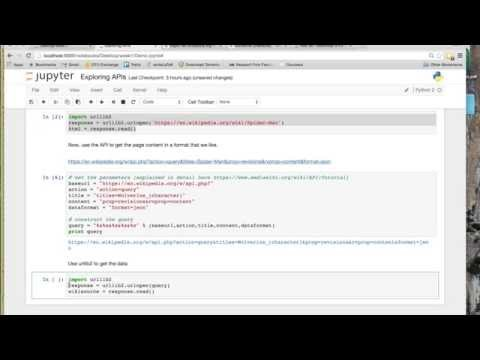

In [14]:
YouTubeVideo("9l5zOfh0CRo",width=800, height=450)

In [15]:
urllib.request.urlopen(url)
response = urllib.request.urlopen("https://zelda.fandom.com/wiki/")
html = response.read()

base_url = "https://zelda.fandom.com/api.php"
action = "action=query"
title = "titles={t}".format(t="Princess_Zelda")
content = "prop=revision&rvprop=content"
dataformat="format=json"

#construct query
query = "%s%s&%s&%s&%s" % (base_url, action, title, content, dataformat)
print(query)
import requests
title="Princess_Zelda"
payload = {
            'format':'json',
            'action':'query',
            'titles':[title],
            'prop':'revisions',
            'rvslots': '*',
            'rvprop': 'content'

}


r = requests.get(base_url, params=payload)
req_json = r.json()

req_json['query']


https://zelda.fandom.com/api.phpaction=query&titles=Princess_Zelda&prop=revision&rvprop=content&format=json


{'normalized': [{'from': 'Princess_Zelda', 'to': 'Princess Zelda'}],
 'pages': {'970': {'pageid': 970,
   'ns': 0,
   'title': 'Princess Zelda',
   'revisions': [{'slots': {'main': {'contentmodel': 'wikitext',
       'contentformat': 'text/x-wiki',
       '*': ':\'\'This article is about the eponymous character of {{TLoZ|-}} franchise. For the video-game series named after her, see {{TLoZ|Series}}. For other uses, see [[Zelda (disambiguation)]]. \n{{Infobox Character\n|image= \n{{Media\n |Artwork TLoZ= File:TLoZ Princess Zelda Artwork.png\n |Artwork TAoL= File:TAoL Princess Zelda and Prince of Hyrule Artwork.png\n |Artwork ALttP= File:Link To The Past Remake - Princess Zelda.png\n |Artwork OoT= File:OoT Adult Zelda Artwork.png\n |Artwork OoT3D= File:Young Princess Zelda OoT3D.png\n |Artwork OoS= File:OoS Zelda Artwork.png\n |Artwork OoA= File:OoA Zelda Artwork.png\n |Artwork FS= File:FS Princess Zelda Artwork.png\n |Artwork TWW= File:TWW Princess Zelda Artwork.png\n |Artwork TWWHD= Fil

Now, to download the Zelda wiki pages of characters, we first need to collect the list of all characters in BotW, starting from the following pages:

1. [The list of allies](https://zelda.fandom.com/wiki/Characters_in_Breath_of_the_Wild)
2. [The list of enemies](https://zelda.fandom.com/wiki/Enemies_in_Breath_of_the_Wild)
3. [The list of bosses](https://zelda.fandom.com/wiki/Bosses_in_Breath_of_the_Wild)



> 
>  _Exercise 1_: Collect the list of BotW Characters 
>
> If you open any of the pages above, you will quickly see that characters are divided by their location in the game (allies) or type (enemies and bosses) and organized alphabetically, but, most importantly, their names are displayed in the form of links to their page. This means that if we use regular expressions to detect all links in the page description we will find them all! Let's get started:
> 1. for each page above, find the baseurl and title and build the related API query (add the parameter `rvslots=*` to your query's content)
> 2. use the query to collect the page (you can save it in a json file for future use) and extract its content
> 3. build a regular expression to find all characters' names (**hint**: all links in these pages have the same format, i.e. `{{Term|Series|name of character|link}}`)
> 4. add the characters names and their role (i.e. "Ally", "Enemy", and "Boss") in a Pandas DataFrame. How many unique characters did you find? How many of them are allies, enemies, and bosses? Are there any repeated characters? If so, drop the duplicates, then save the data in a csv file
>
> **Note**: 
> 1. In the Enemies page there is a section called "Traps", we do not want to include this list in our dataset
> 2. Some Bosses have a link in *parenthesis* to their location in the game, you should filter these links out

In [16]:
def retrieve_query(base_url, title):
    payload = {
                'format':'json',
                'action':'query',
                'titles': title,
                'prop':'revisions',
                'rvslots': '*',
                'rvprop': 'content'

    }

    r = requests.get(base_url, params=payload)
    req_json = r.json()
    return req_json['query']

In [17]:
allies = "https://zelda.fandom.com/wiki/Characters_in_Breath_of_the_Wild"
enemies = "https://zelda.fandom.com/wiki/Enemies_in_Breath_of_the_Wild"
bosses = "https://zelda.fandom.com/wiki/Bosses_in_Breath_of_the_Wild"


In [18]:
base_url = "https://zelda.fandom.com/api.php"
for title in ["Characters_in_Breath_of_the_Wild","Enemies_in_Breath_of_the_Wild", "Bosses_in_Breath_of_the_Wild"]:
    query = retrieve_query(base_url, title)
    
    print(query)

{'normalized': [{'from': 'Characters_in_Breath_of_the_Wild', 'to': 'Characters in Breath of the Wild'}], 'pages': {'77604': {'pageid': 77604, 'ns': 0, 'title': 'Characters in Breath of the Wild', 'revisions': [{'slots': {'main': {'contentmodel': 'wikitext', 'contentformat': 'text/x-wiki', '*': '{{DISPLAYTITLE: Characters in {{BotW|-}}}}\nThe following is a list of characters from {{BotW}}.\n\n==Greater {{Term|BotW|Hyrule}}==\n<gallery>\nFile:BotW Baddek Model.png|{{Term|BotW|Baddek|link}}<!-- Hebra and Central Hyrule -->\nFile:BotW Bamboo Model.png|{{Term|BotW|Bamboo|link}}<!-- Baumar\'s Horse -->\nFile:BotW Banji Model.png|{{Term|BotW|Banji|link}}<!-- Tabantha Bridge Stable -->\nFile:BotW Baumar Model.png|{{Term|BotW|Baumar|link}}<!-- Hebra and Eldin -->\nFile:BotW Bayge Model.png|{{Term|BotW|Bayge|link}}\nFile:BotW Beedle Model.png|{{Term|BotW|Beedle|link}}\nFile:BotW Bolson Model.png|{{Term|BotW|Bolson|link}}\nFile:BotW Brigo Model.png|{{Term|BotW|Brigo|link}}\nFile:BotW Cambo Model

{'normalized': [{'from': 'Enemies_in_Breath_of_the_Wild', 'to': 'Enemies in Breath of the Wild'}], 'pages': {'77608': {'pageid': 77608, 'ns': 0, 'title': 'Enemies in Breath of the Wild', 'revisions': [{'slots': {'main': {'contentmodel': 'wikitext', 'contentformat': 'text/x-wiki', '*': '{{DISPLAYTITLE: Enemies in {{BotW|-}}}}\nThe following is a list of {{Plural|BotW|Enemy|link}} from {{BotW}}.\n\n=={{Plural|BotW|Enemy}}==\n<gallery>\nFile:BotW Black Bokoblin Model.png|{{Term|BotW|Black Bokoblin|link}}\nFile:BotW Black Lizalfos Model.png|{{Term|BotW|Black Lizalfos|link}}\nFile:BotW Black Moblin Model.png|{{Term|BotW|Black Moblin|link}}\nFile:BotW Blizzrobe Model.png|{{Term|BotW|Blizzrobe|link}}\nFile:BotW Blue Bokoblin Model.png|{{Term|BotW|Blue Bokoblin|link}}\nFile:BotW Blue Lizalfos Model.png|{{Term|BotW|Blue Lizalfos|link}}\nFile:BotW Blue-Maned Lynel Model.png|{{Term|BotW|Blue-Maned Lynel|link}}\nFile:BotW Blue Moblin Model.png|{{Term|BotW|Blue Moblin|link}}\nFile:BotW Bokoblin Mod

In [19]:
query = retrieve_query(base_url, "Characters_in_Breath_of_the_Wild")

f = query['pages']['77604']['revisions'][0]['slots']['main']['*']
characters = re.findall(r'\[\[\w+\]\]', f)
characters2 = re.findall(r'\{\{(.*?)\}\}', f)

In [22]:
query2 = retrieve_query(base_url, "Enemies_in_Breath_of_the_Wild")
f = query2['pages']['77608']['revisions'][0]['slots']['main']['*']

In [116]:
query2 = retrieve_query(base_url, "Enemies_in_Breath_of_the_Wild")
page_number = list(query2['pages'].keys())[0]
page_number

'77608'

In [23]:
query3 = retrieve_query(base_url, "Bosses_in_Breath_of_the_Wild")
query3['pages']['77607']['revisions'][0]['slots']['main']['*']

'<noinclude>{{DISPLAYTITLE: Bosses in {{BotW|-}}}}\nThe following is a list of [[Boss]]es from {{BotW}}.</noinclude>\n\n==Overworld Bosses==\n<gallery class="center">\nFile:BotW Stone Talus Model.png|{{Term|BotW|Stone Talus|link}}\nFile:BotW Stone Talus (Junior) Fight.jpg|{{Term|BotW|Stone Talus (Junior)|link}}<br>{{Small|\'\'({{Term|BotW|Dueling Peaks South|link}})\'\'}}\nFile:BotW Stone Talus (Senior) Fight.jpg|{{Term|BotW|Stone Talus (Senior)|link}}<br>{{Small|\'\'({{Term|BotW|North Dueling Peaks|link}})\'\'}}\nFile:BotW Stone Talus (Luminous) Model.png|{{Term|BotW|Stone Talus (Luminous)|link}}\nFile:BotW Stone Talus (Rare) Model.png|{{Term|BotW|Stone Talus (Rare)|link}}\nFile:BotW Igneo Talus Model.png|{{Term|BotW|Igneo Talus|link}}\nFile:BotW Frost Talus Model.png|{{Term|BotW|Frost Talus|link}}\nFile:BotW Hinox Model.png|{{Term|BotW|Hinox|link}}\nFile:BotW Hinox Model 2.jpg|{{Term|BotW|Hinox|link}} (Youngest Kin)<br>{{Small|\'\'({{Term|BotW|Mount Taran|link}})\'\'}}\nFile:BotW Hin

In [53]:
import requests
base_url = "https://zelda.fandom.com/api.php"
for title, page in zip(["Characters_in_Breath_of_the_Wild","Enemies_in_Breath_of_the_Wild", "Bosses_in_Breath_of_the_Wild"], 
                       [77604, 77608, 77607]):
    query = retrieve_query(base_url, title)
    query_formatted = query['pages'][str(page)]['revisions'][0]['slots']['main']['*']
    
    #characters = re.findall(r'\[\[\w+\]\]', f)
    find_char_names(query_formatted)
    #print(query)

In [123]:
def find_char_names(f):
    l = []
    characters2 = re.findall(r'\{\{(.*?)\}\}', f)
    for character in characters2:
        character_pr = re.split("\|", character)
        if len(character_pr) > 2 and 'link' in character_pr: 
            character_pr[2] = character_pr[2].replace(" ", "_")
            l.append(character_pr[2])
    return l

In [124]:
import pandas as pd
import numpy as np

query_a = retrieve_query(base_url, "Characters_in_Breath_of_the_Wild")
page_a = 77604
query_formatted_a = query_a['pages'][str(page_a)]['revisions'][0]['slots']['main']['*']
#print(query_formatted_a)

df = pd.DataFrame()
df['Allies'] = find_char_names(query_formatted_a)
#arr.delete("Master Kohga")
# 
df.drop_duplicates(subset=None, inplace=True)


# df.drop(df['Allies']=='Master Kohga', inplace=True)

l1=[]

for x in df['Allies']:
    l1.append(["ally", x])
    
print(len(l1))
#print(l1)

573


In [125]:
df['Allies']

0           Baddek
1           Bamboo
2            Banji
3           Baumar
4            Bayge
          ...     
568           Paya
569           Rola
570          Steen
571    Ta'loh_Naeg
572         Trissa
Name: Allies, Length: 573, dtype: object

In [126]:
query_e = retrieve_query(base_url, "Enemies_in_Breath_of_the_Wild")
page_e = 77608
query_formatted_e = query_e['pages'][str(page_e)]['revisions'][0]['slots']['main']['*']
print(len(find_char_names(query_formatted_e)))



85


In [127]:
query_formatted_e = query_e['pages'][str(page_e)]['revisions'][0]['slots']['main']['*']
traps = query_formatted_e.split("==Traps==")
en = find_char_names(query_formatted_e)
tr = find_char_names(traps[1])
l3=[]
for x in tr:
    l3.append(["enemy", x])
    
print(len(l3))

# traps = re.findall(r'\{\{(Traps)\}\}', query_formatted_e)
# traps

13


In [128]:
difference = []


en = find_char_names(query_formatted_e)
en = np.array(np.unique(en))
print(len(en))
tr = find_char_names(traps[1])
print(len(tr))

for ch in en:
    if ch not in tr:
        difference.append(ch)

print(len(difference))

74
13
64


In [129]:
l2=[]
for x in difference:
    l2.append(["enemy", x])
    
print(len(l2))


64


In [130]:
query_b = retrieve_query(base_url, "Bosses_in_Breath_of_the_Wild")
page_b = 77607
query_formatted_b = query_b['pages'][str(page)]['revisions'][0]['slots']['main']['*']
df2 = pd.DataFrame()
df2['Bosses'] = find_char_names(query_formatted_b)
df2.drop_duplicates(subset=None, inplace=True)
print(len(find_char_names(query_formatted_b)))

l3=[]
for x in df2['Bosses']:
    l3.append(["boss", x])
    
print(len(l3))




44
23


In [131]:
df_f = pd.DataFrame(data=l1+l2+l3)
df_f.to_csv('characters.csv')

In [132]:
df_f.columns=['Type', 'Character']

Add the characters names and their role (i.e. "Ally", "Enemy", and "Boss") in a Pandas DataFrame. How many unique characters did you find? How many of them are allies, enemies, and bosses? Are there any repeated characters? If so, drop the duplicates, then save the data in a csv file

You've made it! Now, you have a clean file listing all characters in BotW and their role. By following the same strategy you used to download the pages above, you can now use the API and download each character page. For each character, save the resulting page content in a txt file. 

**Note**: 
1. the name of the character corresponds to the title of its page (where spaces are replaced with underscores). So, the title of `Princess Zelda`'s page is `Princess_Zelda`
2. some of your character's names could actually redirect to a different page. Add a check to find any redirect in a page description. (**hint**: the description will be in the form `#REDIRECT [[PAGENAME]]` so you should use `PAGENAME` in your query instead)

---

# Part B: Building the network

Now, we're going to build the BotW NetworkX directed graph, which includes all good characters, enemies, and bosses. 

The nodes in the network will be all the characters, and we will place an edge between nodes $A$ and $B$ if the Zelda wiki page of node $A$ links to the Zelda Wiki page of node $B$.

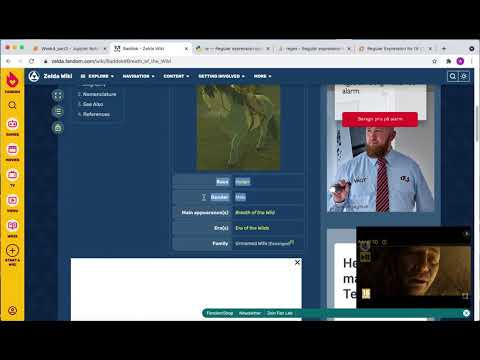

In [33]:
YouTubeVideo("eciQ6qgRD-4", width=800, height=450)

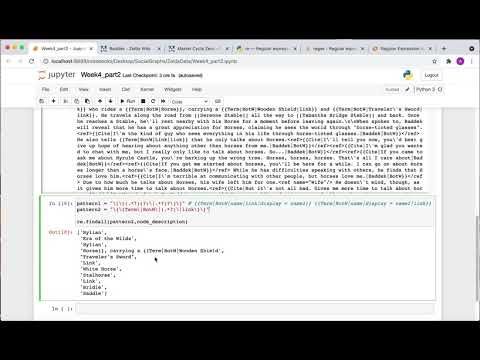

In [34]:
YouTubeVideo("J7SF0Xs2PHM", width=800, height=450)

In [ ]:
pattern2 = "\{\{(Term|Plural)\|BotW\|(.*?)\}\}"

> _Exercise 1_: Build the network of BotW Characters 
>
> Now we can build the network. Isn't this a little bit cool? What a dataset :)
>
> The overall strategy for this is the following: 
> Take the pages you have downloaded for each character. 
> Each page corresponds to a character, which is a node in your network. 
> Find the Race and Gender of a character in their Infobox and use regular expressions to extract them. Then, find all the hyperlinks in a character's page that link to another node of the network (e.g. another character). 
> There are many ways to do this, but below, I've tried to break it down into natural steps. 
> Keep in mind that the network should include all characters (allies, enemies, and bosses).
> 
>


In [133]:
#urllib.parse.quote_plus(name)
for ch in df_f['Character']:
    query3 = retrieve_query(base_url, ch)
    page_number = list(query3['pages'].keys())[0]
    text = query3['pages'][page_number]['revisions'][0]['slots']['main']['*']
    text_file = open(str(ch)+".txt", "w")
    text_file.write(text)
    text_file.close()


In [122]:
query3['pages'][page_number]

{'ns': 0, 'title': 'PrincessZelda', 'missing': ''}

In [134]:
csv_anna = pd.read_csv("files/ZeldaBotW_nodes_w_attributes_enriched.csv")
csv_anna.head(5)

,Name,Role,Race,Gender
0,Baddek,Ally,Hylian,Male
1,Bamboo,Ally,Horse,Unknown
2,Banji,Ally,Hylian,Female
3,Baumar,Ally,Hylian,Male
4,Bayge,Ally,Goron,Male


> * Use regular expressions to extract all outgoing links from each of the pages you downloaded above. Remember that links have different [flavors](https://zelda.fandom.com/wiki/Guidelines:Getting_Started), these are the ones we need (they seem a lot but you've already built the patterns in 1. and 2. and just need to add a condition to them):
      1. direct links, i.e. [[name of character]] or {{Term|BotW|name of character|link}}
      2. links using text, i.e. [[Princess Zelda|Zelda]] or {{Term|Series|Princess Zelda|link|display=Zelda}}
      3. links to pages that have parentheses, i.e. [[Ocarina of Time (Item)|]] or {{Term|Series|Ocarina of Time (Item)|link}}
      4. links using plural terms, i.e. [[Heart]]s or {{Plural|Series|Heart|link}}
      5. links to sections of another page, i.e. [[Link#Breath of the Wild]] or {{Term|BotW|Link|link}}
>


In [327]:
##For each character in the csv, extract the links to the nodes in the descripton file
#direct links
pattern1 = '\[\[(.*?)(?:\|.*?)?\]\]'
pattern2 = "\{\{(Term|Plural)\|BotW\|(.*?)\}\}"
list_p1_big = []
list_p1_clean = dict()



for character in csv_anna["Name"]:
    character = character.replace(" ", "_")
    list_links1=[]
    list_links2=[]
    list_per_ch = []
    with open(character+'.txt') as f:
        node_description = f.read()
        list_p1 = re.findall(pattern1, node_description)
        list_p2 = re.findall(pattern2, node_description)
        
    for i, ch in enumerate(list_p1):
        if ch in list(csv_anna["Name"]):
            print(ch)
            list_links1.append(ch)
            
    
    
    for i, el in enumerate(list_p2):
        x = el[0]
        y = el[1]
        #print(y)
        character_n = y.split('|')[0]
        #print(character_n) 
        if 'link' in character_n:
            character_n = character_n.split('|link')[0]
        if character_n in list(csv_anna["Name"]):
            list_links2.append(character_n)
    
    list_links1 = np.array(np.unique(list_links1))
    list_links2 = np.array(np.unique(list_links2))
    #make a dictionary
    list_links = list(list_links1)+list(list_links2)
    print(list_links)
    list_p1_clean[str(character)]= list_links
   

Nazbi
Savelle
Yammo
['Nazbi', 'Savelle', 'Yammo', 'Link']
Baumar
Baumar
['Baumar', 'Baumar']
Ena
Hylia
Malanya
Chork
Dabi
Geggle
Ena
Kenyo
Sho
['Chork', 'Dabi', 'Ena', 'Geggle', 'Hylia', 'Kenyo', 'Malanya', 'Sho', 'Konba']
Falmark
['Falmark', 'Bamboo', 'Selmie']
Heehl
Kabetta
Heehl
Kabetta
Daruk
Heehl
Kabetta
['Daruk', 'Heehl', 'Kabetta']
Link
Link
['Link', 'Beedle']
['Boldon', 'Bolson', 'Hudson', 'Karson', 'Link']
['Decayed Guardian', 'Guardian Stalker', 'Link']
['Link']
['Black Bokoblin', 'Blue Bokoblin', 'Bokoblin', 'Kilton', 'Link']
['Geggle', 'Kass', 'Link']
['Link']
['Dabi']
Yunobo
Calamity Ganon
Fireblight Ganon
Link
Princess Zelda
Revali
Yunobo
Bludo
Dark Beast Ganon
King Rhoam
Bokoblin
King Rhoam
['Bludo', 'Bokoblin', 'Calamity Ganon', 'Dark Beast Ganon', 'Fireblight Ganon', 'King Rhoam', 'Link', 'Princess Zelda', 'Revali', 'Yunobo']
Nazbi
['Nazbi', 'Nazbi']
Farosh
Naydra
['Farosh', 'Naydra', 'Dinraal', 'Farosh', 'Link', 'Naydra']
[]
[]
Link
Malanya
['Link', 'Malanya']
Dinraal

['Calamity Ganon', 'Dila Maag', 'Hylia', 'Link']
Jora
Link
Bokoblin
['Bokoblin', 'Jora', 'Link']
[]
[]
Dillie
Link
Bokoblin
['Bokoblin', 'Dillie', 'Link']
[]
['Calamity Ganon', 'Hylia', 'Keive Tala', 'Link']
[]
Link
['Link']
['Calamity Ganon', 'Hylia', "Korsh O'hu", 'Link']
Link
['Link']
['Calamity Ganon', 'Hylia', 'Link', 'Misae Suma']
['Link', 'Padda', 'Patricia', 'Riju']
Link
Furosa
['Furosa', 'Link']
['Calamity Ganon', 'Hylia', 'Link', 'Raqa Zunzo']
Urbosa
Link
Buliara
Urbosa
Teake
Urbosa
Patricia
['Buliara', 'Link', 'Patricia', 'Teake', 'Urbosa']
Tali
Link
['Link', 'Tali']
Link
Lyndae
['Link', 'Lyndae']
Riju
Link
['Link', 'Riju']
['Calamity Ganon', 'Hylia', 'Link', 'Takama Shiri']
Shabonne
['Shabonne', 'Teli']
Kaysa
Cotera
Link
['Cotera', 'Kaysa', 'Link']
['Calamity Ganon', 'Hylia', 'Link', 'Tho Kayu']
Estan
Spera
['Estan', 'Spera', 'Ardin', 'Jules', 'Link', 'Nellie']
Pasha
Dina
Risa
['Dina', 'Pasha', 'Risa', 'Ashai', 'Dina', 'Link', 'Pasha', 'Risa']
Ashai
['Ashai', 'Ashai', 'Auri

['Bolson', 'Karin', 'Medda', 'Aster', 'Bolson', 'Link', 'Medda']
Pruce
Ivee
Amira
Sefaro
['Amira', 'Ivee', 'Pruce', 'Sefaro', 'Amira', 'Azu', 'Ivee', 'Karin', 'Link', 'Pruce', 'Purah', 'Sefaro']
['Clavia', 'Karin', 'Link', 'Reede']
[]
Teebo
Hylia
['Hylia', 'Teebo', 'Horned Statue', 'Link']
Link
['Link', 'Amira', 'Azu', 'Pruce']
['Clavia', 'Reede']
['Dantz', 'Koyin', 'Link', 'Tokk']
Prima
['Prima', 'Purah']
['Link', 'Manny (Breath of the Wild)']
['Aster', 'Link', 'Medda', 'Princess Zelda']
[]
Link
Sayge
['Link', 'Sayge', 'Nack', 'Nikki']
['Amira', 'Link', 'Nack', 'Nebb', 'Nikki']
['Link', 'Nack', 'Narah', 'Nikki']
['Amira', 'Link', 'Nack', 'Narah', 'Nebb', 'Nikki', 'Purah']
['Link', 'Manny (Breath of the Wild)']
Link
['Link', 'Amira', 'Azu', 'Ivee']
['Calamity Ganon', 'Impa', 'Link', 'Monk Maz Koshia', 'Paya', 'Princess Zelda', 'Purah', 'Robbie', 'Symin']
Rozel
['Rozel', 'Link', 'Purah', 'Rhodes']
['Clavia', 'Karin', 'Link', 'Purah', 'Reede']
['Link', 'Ralera']
Senna
['Senna', 'Sayge', 

Blue Lizalfos
Black Lizalfos
Cursed Lizalfos
Golden Lizalfos
Fire-Breath Lizalfos
Ice-Breath Lizalfos
Electric Lizalfos
Stalizalfos
['Black Lizalfos', 'Blue Lizalfos', 'Calamity Ganon', 'Cursed Lizalfos', 'Electric Lizalfos', 'Fire-Breath Lizalfos', 'Golden Lizalfos', 'Ice-Breath Lizalfos', 'Link', 'Lizalfos', 'Stalizalfos']
Lynel
White-Maned Lynel
['Lynel', 'White-Maned Lynel', 'Silver Lynel']
Golden Moblin
['Golden Moblin', 'Black Moblin', 'Calamity Ganon', 'Moblin', 'Silver Moblin']
Link
['Link']
Link
Rock Octorok
Water Octorok
Forest Octorok
Treasure Octorok
Sky Octorok
['Forest Octorok', 'Link', 'Rock Octorok', 'Sky Octorok', 'Treasure Octorok', 'Water Octorok']
Lizalfos
Lizalfos
Link
Cursed Lizalfos
Stalkoblin
Stalmoblin
Lizalfos
Blue Lizalfos
Black Lizalfos
Silver Lizalfos
Golden Lizalfos
Fire-Breath Lizalfos
Ice-Breath Lizalfos
Electric Lizalfos
Cursed Lizalfos
['Black Lizalfos', 'Blue Lizalfos', 'Cursed Lizalfos', 'Electric Lizalfos', 'Fire-Breath Lizalfos', 'Golden Lizalfos',

In [328]:
print(list_p1_clean)

{'Baddek': ['Nazbi', 'Savelle', 'Yammo', 'Link'],
 'Bamboo': ['Baumar', 'Baumar'],
 'Banji': ['Chork',
  'Dabi',
  'Ena',
  'Geggle',
  'Hylia',
  'Kenyo',
  'Malanya',
  'Sho',
  'Konba'],
 'Baumar': ['Falmark', 'Bamboo', 'Selmie'],
 'Bayge': ['Daruk', 'Heehl', 'Kabetta'],
 'Beedle': ['Link', 'Beedle'],
 'Bolson': ['Boldon', 'Bolson', 'Hudson', 'Karson', 'Link'],
 'Brigo': ['Decayed Guardian', 'Guardian Stalker', 'Link'],
 'Cambo': ['Link'],
 'Chabi': ['Black Bokoblin', 'Blue Bokoblin', 'Bokoblin', 'Kilton', 'Link'],
 'Chork': ['Geggle', 'Kass', 'Link'],
 'Chumin': ['Link'],
 'Dabi': ['Dabi'],
 'Daruk': ['Bludo',
  'Bokoblin',
  'Calamity Ganon',
  'Dark Beast Ganon',
  'Fireblight Ganon',
  'King Rhoam',
  'Link',
  'Princess Zelda',
  'Revali',
  'Yunobo'],
 'Dauntless': ['Nazbi', 'Nazbi'],
 'Dinraal': ['Farosh', 'Naydra', 'Dinraal', 'Farosh', 'Link', 'Naydra'],
 'Ena': [],
 'Endai': [],
 'Epona': ['Link', 'Malanya'],
 'Farosh': ['Dinraal', 'Naydra', 'Dinraal', 'Farosh', 'Link', 'Na

In [329]:
pattern2 = "\{\{(Term|Plural)\|BotW\|(.*?)\}\}"
list_p2_big = []
list_p2_clean = []
for ch in df_f['Character']:
    with open(ch+'.txt') as f:
        node_description = f.read()
        list_p2 = re.findall(pattern2, node_description)
    for i, (x, y) in enumerate(list_p2):
        character_n = y.split('|')[0]
        if character_n in list(csv_anna["Name"]):
            list_p2_clean.append((x, y))
                
    


In [330]:
print(len(list_p1_clean))
print(len(list_p2_clean))

656
2935


> * For each link you extract, check if the target is a character. If yes, keep it. If no, discard it.

    **I have done that above**
> * Use a NetworkX [`DiGraph`](https://networkx.github.io/documentation/development/reference/classes.digraph.html) to store the network. Store also the properties of the nodes (i.e. from which universe they hail).
> * When you have finished, you'll notice that some nodes do not have any edge. Those are isolated nodes, you may *discard* them from the network.
>
> **Note**: When you add a node to the network, also include an `attribute` for each node characteristic (i.e. an attribute that specifies Role, Race, and Gender)

In [419]:
#DiGraph = Directed graphs with self loops
import networkx as nx
G = nx.DiGraph()

#attributed default
race_f = ''
gender_f = ''
role = ''
#iterate through the dictionary of characters and links (added as a list)
for x, y in zip(list_p1_clean.keys(), list_p1_clean.values()):
    #attributes
    race = csv_anna[csv_anna["Name"]==str(x)]["Race"].values
    if race:
        race_f = race[0]
    gender = csv_anna[csv_anna["Name"]==str(x)]["Gender"].values
    if gender:
        gender_f = gender[0]
    role = csv_anna[csv_anna["Name"]==str(x)]["Role"].values
    if role:
        role_f = role[0]
    length = len(y)
    #add nodes with attributes
    G.add_node(x, race =race_f, gender = gender_f, role=role_f, length = length)
    #add edges for each link in the list
    for link in y:
        G.add_edge(x, link)



/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  del sys.path[0]
/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  app.launch_new_instance()
/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


In [420]:
print(len(list_p1_clean.keys()))

656


In [421]:
G.number_of_edges()

1794

In [339]:
for x, ey in zip(list_p1_clean.keys(), list_p1_clean.values()):
    print(csv_anna[csv_anna["Name"]==x]["Race"].values)
    print(csv_anna[csv_anna["Name"]==x]["Gender"].values)

['Hylian']
['Male']
['Horse']
['Unknown']
['Hylian']
['Female']
['Hylian']
['Male']
['Goron']
['Male']
['Human']
['Male']
['Hylian']
['Male']
['Hylian']
['Male']
['Hylian']
['Male']
['Hylian']
['Female']
['Hylian']
['Male']
['Hylian']
['Male']
['Hylian']
['Male']
['Goron']
['Male']
['Horse']
['Unknown']
['Dragon']
['Unknown']
['Hylian']
['Female']
['Hylian']
['Male']
['Horse']
['Female']
['Dragon']
['Unknown']
['Rito']
['Male']
['Unknown']
['Unknown']
['Goron']
['Male']
['Goron']
['Male']
['Korok']
['Male']
['Hylian']
['Male']
['Hylian']
['Female']
['Goron']
['Male']
['Hylian']
['Male']
['Zora']
['Male']
['Hylian']
['Male']
['Rito']
['Male']
['Hylian']
['Male']
['Hylian']
['Male']
['Hylian']
['Female']
['Hylian']
['Male']
['Hylian']
['Female']
['Hylian']
['Female']
['Zora']
['Female']
['Hylian']
['Male']
['Hylian']
['Female']
['Zora']
['Female']
['Unknown']
['Unknown']
['Hylian']
['Female']
['Dragon']
['Unknown']
['Hylian']
['Male']
['Goron']
['Male']
['Sheikah']
['Male']
['Hylian']
['

['Female']
['Hylian']
['Female']
['Hylian']
['Male']
['Sheikah']
['Female']
['Hylian']
['Female']
['Hylian']
['Male']
['Hylian']
['Male']
['Hylian']
['Male']
['Hylian']
['Male']
['Hylian']
['Male']
['Hylian']
['Female']
['Hylian']
['Female']
['Sheikah']
['Male']
['Hylian']
['Female']
['Hylian']
['Male']
['Hylian']
['Male']
['Hylian']
['Male']
['Hylian']
['Female']
['Hylian']
['Male']
['Hylian']
['Male']
['Hylian']
['Female']
['Hylian']
['Male']
['Hylian']
['Female']
['Hylian']
['Male']
['Hylian']
['Female']
['Hylian']
['Male']
['Hylian']
['Male']
['Hylian']
['Male']
[]
[]
['Hylian']
['Male']
[]
[]
[]
[]
['Rito']
['Male']
['Hylian']
['Male']
['Hylian']
['Female']
['Hylian']
['Male']
['Hylian']
['Female']
['Great Fairy']
['Female']
['Hylian']
['Male']
['Hylian']
['Male']
['Hylian']
['Male']
[]
[]
[]
[]
['Hylian']
['Male']
['Hylian']
['Male']
['Hylian']
['Female']
['Hylian']
['Male']
[]
[]
[]
[]
['Hylian']
['Male']
['Hylian']
['Female']
[]
[]
['Hylian']
['Male']
[]
[]
[]
[]
['Hylian']
['M

In [422]:
G.node['Baddek']

{'race': 'Hylian', 'gender': 'Male', 'role': 'Ally', 'length': 4}

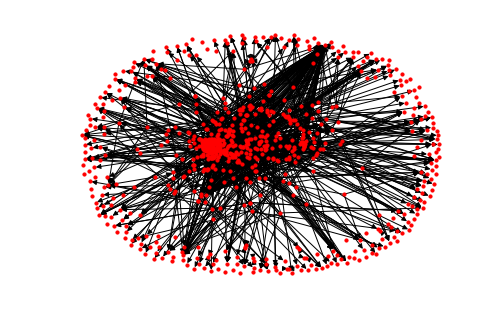

In [351]:
nx.draw_spring(G, node_size=10)

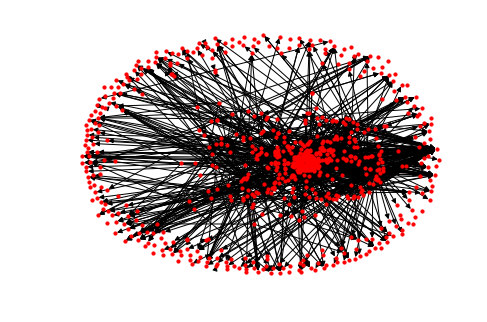

In [349]:
nx.draw(G, node_size=10)

> Week 4
> *Exercise 2*: Simple network statistics and analysis
>
> * What is the number of nodes in the network? 
> * More importantly, what is the number of links?


In [368]:
#nodes
print("Nodes:", len(list(G.nodes())))
print("Links: ", G.number_of_edges())

Nodes: 796
Links 1794


> * Plot the distributions of Role, Race, and Gender.



In [385]:
#Distributions of Role
import matplotlib.pyplot as plt
role = nx.get_node_attributes(G, 'role')
race = nx.get_node_attributes(G, 'race')
gender = nx.get_node_attributes(G, 'gender')

In [394]:
role

{'Baddek': 'Ally',
 'Nazbi': 'Ally',
 'Savelle': 'Ally',
 'Yammo': 'Ally',
 'Link': 'Ally',
 'Bamboo': 'Ally',
 'Baumar': 'Ally',
 'Banji': 'Ally',
 'Chork': 'Ally',
 'Dabi': 'Ally',
 'Ena': 'Ally',
 'Geggle': 'Ally',
 'Hylia': 'Ally',
 'Kenyo': 'Ally',
 'Malanya': 'Ally',
 'Sho': 'Ally',
 'Konba': 'Ally',
 'Falmark': 'Ally',
 'Selmie': 'Ally',
 'Bayge': 'Ally',
 'Daruk': 'Ally',
 'Heehl': 'Ally',
 'Kabetta': 'Ally',
 'Beedle': 'Ally',
 'Bolson': 'Ally',
 'Boldon': 'Ally',
 'Hudson': 'Ally',
 'Karson': 'Ally',
 'Brigo': 'Ally',
 'Cambo': 'Ally',
 'Chabi': 'Ally',
 'Bokoblin': 'Enemy',
 'Kilton': 'Ally',
 'Kass': 'Ally',
 'Chumin': 'Ally',
 'Bludo': 'Ally',
 'Revali': 'Ally',
 'Yunobo': 'Ally',
 'Dauntless': 'Ally',
 'Dinraal': 'Ally',
 'Farosh': 'Ally',
 'Naydra': 'Ally',
 'Endai': 'Ally',
 'Epona': 'Ally',
 'Fyson': 'Ally',
 'Misa': 'Ally',
 'Goflam': 'Ally',
 'Greyson': 'Ally',
 'Axyl': 'Ally',
 'Bohrin': 'Ally',
 'Dorill': 'Ally',
 'Jengo': 'Ally',
 'Pelison': 'Ally',
 'Rhondson': '

<BarContainer object of 656 artists>

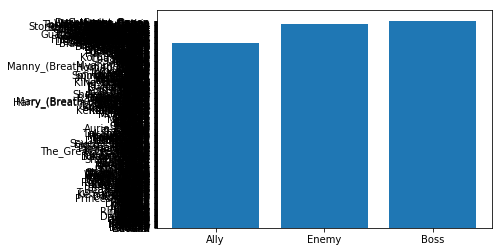

In [477]:
plt.bar(role.values(), role.keys())

In [490]:
counts["Role"]

0     Ally
1     Boss
2    Enemy
Name: Role, dtype: object

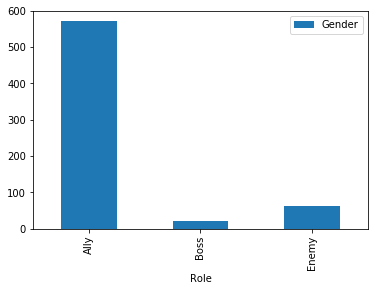

In [491]:
counts = csv_anna.groupby("Role").count().reset_index()
counts.plot(x="Role", y="Gender",kind='bar')

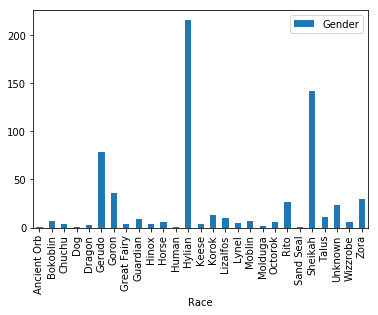

In [492]:
counts = csv_anna.groupby("Race").count().reset_index()
counts.plot(x="Race", y="Gender",kind='bar')

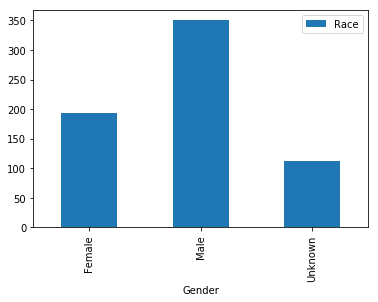

In [494]:
counts = csv_anna.groupby("Gender").count().reset_index()
counts.plot(x="Gender", y="Race",kind='bar')

> * Plot the total (in+out), in and out-degree distributions. What do you observe? Can you explain why the in-degree distribution is different from the out-degree distribution?
>     * Compare the degree distribution to a *random network* with the same number of nodes and *p*
>     * Compare the degree distribution to a *scale-free* network with the same number of nodes.

<BarContainer object of 384 artists>

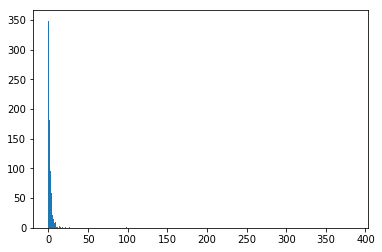

In [406]:
in_deg = [v for k, v in dict(G.in_degree).items()]
out_deg =  [v for k, v in dict(G.out_degree).items()]
degrees = [v for k, v in dict(G.degree).items()]


max_degree = np.max(in_deg)
min_degree = np.min(in_deg)
vector = np.arange(min_degree,max_degree)
hist, bin_edges = np.histogram(in_deg, bins=vector)
bin_means = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)]
plt.bar(bin_means, hist, width=bin_edges[1] - bin_edges[0])


<BarContainer object of 13 artists>

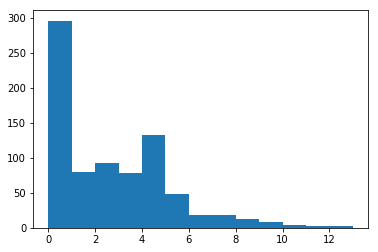

In [407]:
max_degree = np.max(out_deg)
min_degree = np.min(out_deg)
vector = np.arange(min_degree,max_degree)
hist, bin_edges = np.histogram(out_deg, bins=vector)
bin_means = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)]
plt.bar(bin_means, hist, width=bin_edges[1] - bin_edges[0])


In [411]:
def plot_graph(G):
    degrees = [v for k, v in dict(G.degree).items()]
    max_degree = np.max(degrees)
    min_degree = np.min(degrees)
    vector = np.arange(min_degree,max_degree)
    hist_pois, bin_edges = np.histogram(degrees,bins=vector)
    hist, bin_edges = np.histogram(degrees, bins=vector)
    bin_means = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)]
    plt.bar(bin_means, hist, width=bin_edges[1] - bin_edges[0])
    plt.show()

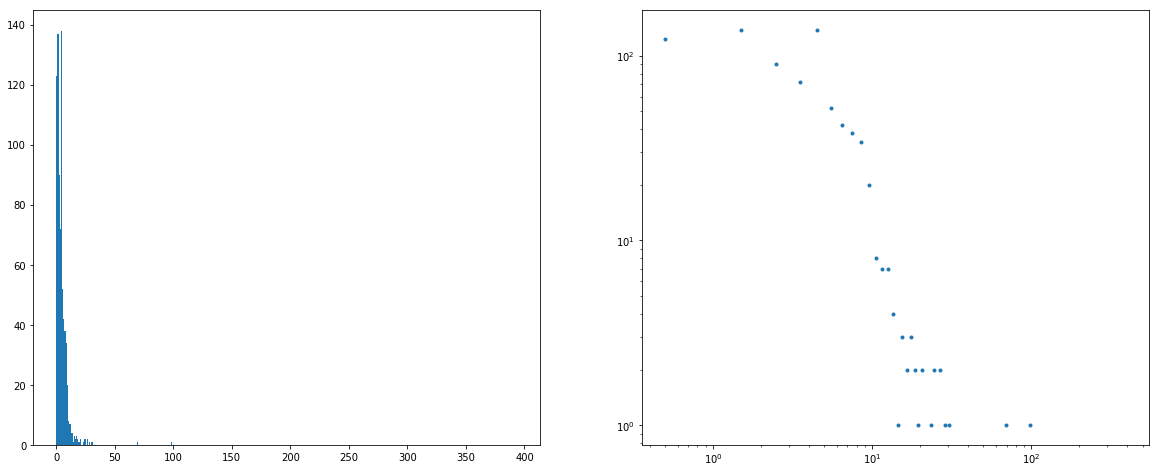

In [418]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))


max_degree = np.max(degrees)
min_degree = np.min(degrees)
vector = np.arange(min_degree,max_degree)
hist_pois, bin_edges = np.histogram(degrees,bins=vector)
hist, bin_edges = np.histogram(degrees, bins=vector)
bin_means = [0.5 * (bin_edges[i] + bin_edges[i+1]) for i in range(len(bin_edges)-1)]
ax1.bar(bin_means, hist, width=bin_edges[1] - bin_edges[0])
plt.loglog(bin_means, hist, marker='.', linestyle='None')

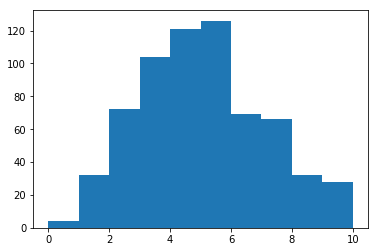

In [502]:
#random network with the same probability??
nodes = len(csv_anna)
degrees = [v for k, v in dict(G.degree).items()]
p = np.mean(degrees)/(nodes-1)
G_RN = nx.erdos_renyi_graph(n=nodes, p=p)
plot_graph(G_RN)


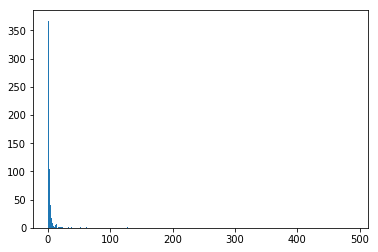

In [413]:
#scale-free network
G_SF = nx.scale_free_graph(nodes)
plot_graph(G_SF)

> * Who is the top connected character in BotW? (Report results for the undirected network, in-degrees and out-degrees). Comment on your findings. Is this what you would have expected?
> * Who are the top 5 most connected allies (again in terms of all edges, and in/out-degree)?
> * Who are the top 5 most connected enemies -- bosses included -- (again in terms of all edges in/out-degree)?

In [432]:
##top character 
##NOT ANSWERED YET

> The total degree distribution (in + out degree) for you network should resemble the distribution displayed on the image below *(`Isolated` means that we have discarded the nodes with zero degrees)*:
![img](https://github.com/SocialComplexityLab/socialgraphs2021/blob/main/files/week4_degrees.png?raw=true)
> *Tip:* If you want your `matplotlib` plots to look like the one above, you can download the `seaborn` package and do the following: `import seaborn as sns
sns.set()`


### Week 5

In [423]:
#DiGraph = Directed graphs with self loops
import networkx as nx
G = nx.DiGraph()

#attributed default
race_f = ''
gender_f = ''
role = ''
#iterate through the dictionary of characters and links (added as a list)
for x, y in zip(list_p1_clean.keys(), list_p1_clean.values()):
    #attributes
    race = csv_anna[csv_anna["Name"]==str(x)]["Race"].values
    if race:
        race_f = race[0]
    gender = csv_anna[csv_anna["Name"]==str(x)]["Gender"].values
    if gender:
        gender_f = gender[0]
    role = csv_anna[csv_anna["Name"]==str(x)]["Role"].values
    if role:
        role_f = role[0]
    length = len(y)
    #add nodes with attributes
    G.add_node(x, race =race_f, gender = gender_f, role=role_f, length = length)
    #add edges for each link in the list
    for link in y:
        G.add_edge(x, link)

/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  del sys.path[0]
/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  app.launch_new_instance()
/Users/dariazahaleanu/opt/anaconda3/envs/sg2/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


*Week 5 Exercise 1:* Build the right graph for visualization:

>1. Use NetworkX `DiGraph` to store the network of characters. Remember that characters are linked if they have a corresponding link between their Zelda Wiki contents.
>   * **Additionally**, extract the largest component - it will make our work with visualizations much easier (note: removing *isolated* nodes (with no links) does not guarantee that you are left with the largest component).
>     - *Note 1*: You probably have the right graph if you have more than 500 nodes and more than 1500 edges.
<font color='red'>Yep, checked in Week 4.ipynb</font>
>     - *Note 2*: For directed graphs use `weakly connected component` to extract the largest component.
>     - *Note 3*: Further analysis is done with the largest component


In [424]:
#weakly connected component
Gcc = sorted(nx.weakly_connected_components(G), key=len, reverse=True)
largest_comp = G.subgraph(Gcc[0])
print(len(list(largest_comp.nodes())))
#weakly connected component 
#G.add_edges_from([[(node, edge) for node, edge in list(G.nodes), list(edges)[i] for i in range(len(edges)) ])

654


>2. As you build the graph, store the attributes of the nodes (remember the `role`,`race`, and `gender`). On top of that, let's also store the `length of the content` as one of the attributes of the node (i.e. count the number of *words* you have in each character's page). By storing this information as nodal features, we keep all the relevant data in one place. The safe way to count words without counting symbols is to use `regex`, but simpler methods are OK.

* Week 5 Exercise 2:* Let's build a simple visualization of the network
>1. For the sake of the visualisation, let's convert our network to *undirected graph* (tip: There is a NetworkX command to help you).
>   * *Note*: Keep the directed graph, we will use it in couple of the following exercises


In [425]:
#convert to undirected graph
G_undirected = G.to_undirected(reciprocal=False, as_view=False)

>2. Use the NetworkX command `nx.draw_kamada_kawai` to draw the resulting undirected network. (You can find [background on the algorithm here](https://en.wikipedia.org/wiki/Force-directed_graph_drawing).)  
>   * Node color should depend on the `role` attribute (i.e. use different colors for allies, enemies, and bosses)
>   * Set up your plot so that node-size depends on the node *degree*
>   * **Optional**: Set up you plot so that edge color depends on the `role` attribute. If an edge connects allies assign `color_a`, if the edge connects enemies/bosses assign `color_b`, in other cases assign `color_c` (i.e. when allies connect to either enemies or bosses). (Here, you get to decide on the colors.)

In [467]:
def role_to_color(role):
    if role =='Ally':
        return "green"
    elif role =='Enemy':
        return "blue"
    elif role =='Boss':
        return "red"
   

In [468]:
def degree_to_size(degree):
    if degree>=0 and degree<5:
        return 10
    if degree>=5 and degree<10:
        return 15
    else:
        return 20

In [469]:
csv_anna['Role']

0      Ally
1      Ally
2      Ally
3      Ally
4      Ally
       ... 
651    Boss
652    Boss
653    Boss
654    Boss
655    Boss
Name: Role, Length: 656, dtype: object

In [503]:
#Node color should depend on the role attribute
role = nx.get_node_attributes(G, 'role')
role_color = [role_to_color(r) for r in role.values()]
#print(role_color)
#node-size depends on the node degree
degrees = [v for k, v in dict(G.degree).items()]
degree_size = [degree_to_size(d) for d in degrees]

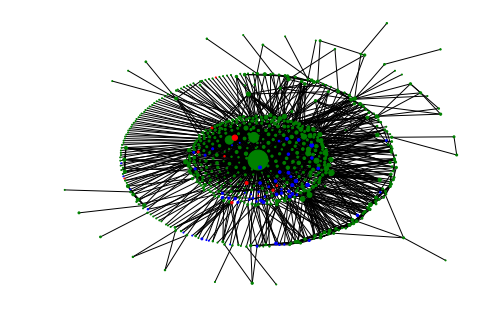

In [476]:
nx.draw_kamada_kawai(G_undirected, node_size=degrees, node_color=role_color)
#nx.draw(G_undirected, node_size=degrees, node_color=role_color)